# TODO
- ✅ add unblacend class
- ⬜ batch norm
- ⬜ regularizer
- ✅ train/dev/test
- ⬜ lr tuner
- ✅ add normalizing 





In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set(rc={'figure.figsize' : (10, 5)})
sns.set_style("darkgrid", {'axes.grid' : True})

Reading csv files and showing first and last 5 records. 

In [5]:
diabetes = pd.read_csv('diabetes.csv')
dia = diabetes.copy()

In [136]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# diabetes.Pregnancies = diabetes.Pregnancies.replace(0,333)
# diabetes.Outcome = diabetes.Outcome.replace(0,333)
# diabetes

# diabetes = diabetes.replace(0, np.nan)
# diabetes = diabetes.dropna()
# # df = df.replace(np.nan, 0.0)

# diabetes.Pregnancies = diabetes.Pregnancies.replace(333,0)
# diabetes.Outcome = diabetes.Outcome.replace(333,0)
# diabetes

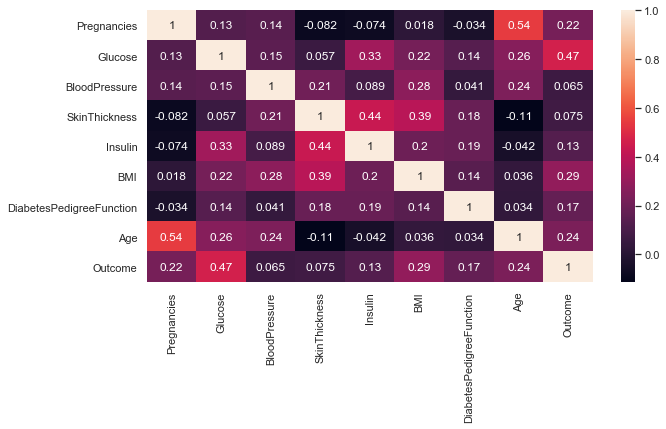

In [8]:
corrMatrix = diabetes.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
from sklearn.dummy import DummyClassifier
x = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
dummy = DummyClassifier('most_frequent') #returining most frequent class in this case 1/
results = dummy.fit(x,y)
results.score(x,y)

0.6510416666666666

In [13]:
len( # Number of recrds that have at least one zero in it
    x[(x.Glucose == 0) |
    (x.BloodPressure ==0) |
    (x.SkinThickness==0) |
    (x.Insulin==0) |
    (x.BMI==0) |
    (x.DiabetesPedigreeFunction==0) |
    (x.Age==0)]
)

376

## Some Funcs

In [14]:
from tensorflow import keras
import tensorflow.keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
def max_metric (history):
    max_acc = max(history.history['accuracy'])
    max_f1 = max(history.history['get_f1'])
    min_loss = min(history.history['loss'])
    max_val_acc = max(history.history['val_accuracy'])
    max_val_f1 = max(history.history['val_get_f1'])
    min_val_loss = min(history.history['val_loss'])
    print(f"Maximum Accuracy: {max_acc} \nMaximum F1 Score: {max_f1} \nMinimum Binary CrossEntropy Loss: {min_loss} \nMaximum Validation Accuracy: {max_val_acc} \nMaximum Validation F1 Score: {max_val_f1} \nMaximum Validation Binary CrossEntropy Loss: {min_val_loss} \n")


In [75]:
def plot_this(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for f1
    plt.plot(history.history['get_f1'])
    plt.plot(history.history['val_get_f1'])
    plt.title('model f1')
    plt.ylabel('f1')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Normalization

In [17]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# normalize the data
# we do not want to modify our label column Exited
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']

# copy churn dataframe to churn_norm to do not affect the original data
dia_norm = diabetes.copy()

# normalize churn_norm dataframe 
dia_norm[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

x = dia_norm.drop(columns = 'Outcome')
y = dia_norm['Outcome']

In [21]:
dia_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [137]:
dia_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
Outcome,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


## Logistic Regression

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax, y, test_size=0.33, random_state=42)

In [58]:
parameters = {'C': np.linspace(0.0001, 100, 40)}
grid_search = GridSearchCV(LogisticRegression(max_iter=3000, class_weight={0:0.35, 1:0.65}), parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 2.5642}
best scrores:  0.7645345516847516


In [59]:
lr_clf = LogisticRegression(C=2.5642, max_iter=3000, class_weight={0:0.35, 1:0.65})
lr_clf.fit(X_train, y_train)

LogisticRegression(C=2.5642, class_weight={0: 0.35, 1: 0.65}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
lr_clf.score(X_test, y_test)

0.7086614173228346

In [62]:
from sklearn.metrics import f1_score
y_hat = lr_clf.predict(X_test)
f1 = f1_score(y_test, y_hat)
print (f"f1 socre is: {f1} ")

f1 socre is: 0.6145833333333333 


In [26]:
#lr_clf.predict_proba(x.iloc[[700]]) #FOR PREDICtion

## SVM

In [63]:
parameters = {'C': np.linspace(0.0001, 100, 40)}
grid_search = GridSearchCV(svm.SVC(probability=True, max_iter=300, class_weight={1: 0.65, 0:0.35}), parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 28.205199999999998}
best scrores:  0.7470778602703217


In [64]:
from sklearn import svm

clf = svm.SVC(C=28.205199999999998, gamma='auto', probability=True, verbose=True, max_iter=3000, class_weight={1: 0.65, 0:0.35})
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=28.205199999999998, break_ties=False, cache_size=200,
    class_weight={0: 0.35, 1: 0.65}, coef0=0.0, decision_function_shape='ovr',
    degree=3, gamma='auto', kernel='rbf', max_iter=3000, probability=True,
    random_state=None, shrinking=True, tol=0.001, verbose=True)

In [65]:
clf.score(X_test, y_test)

0.7125984251968503

In [66]:
from sklearn.metrics import f1_score
y_hat = clf.predict(X_test)
f1 = f1_score(y_test, y_hat)
print (f"f1 socre is: {f1} ")

f1 socre is: 0.6256410256410256 


## Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [69]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print (f"f1 socre is: {f1} ")

f1 socre is: 0.6171428571428572 


## Neural net

In [128]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16, input_dim=x.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))#activation = 'relu' ))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [129]:
model2.compile(optimizer='rmsprop', loss='MSE', metrics=['accuracy', get_f1])

In [130]:
history2 = model2.fit(X_train, y_train, validation_split=0.20, batch_size=64, workers=-1, epochs=100, verbose=2, class_weight={0:0.35, 1:0.65})

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 411 samples, validate on 103 samples
Epoch 1/100
411/411 - 2s - loss: 0.1745 - accuracy: 0.5012 - get_f1: 0.4183 - val_loss: 0.1730 - val_accuracy: 0.6408 - val_get_f1: 0.5111
Epoch 2/100
411/411 - 0s - loss: 0.1708 - accuracy: 0.5134 - get_f1: 0.4087 - val_loss: 0.1708 - val_accuracy: 0.6408 - val_get_f1: 0.4826
Epoch 3/100
411/411 - 0s - loss: 0.1703 - accuracy: 0.5134 - get_f1: 0.4235 - val_loss: 0.1683 - val_accuracy: 0.6214 - val_get_f1: 0.4867
Epoch 4/100
411/411 - 0s - loss: 0.1669 - accuracy: 0.5207 - get_f1: 0.3952 - val_loss: 0.1663 - val_accuracy: 0.6214 - val_get_f1: 0.5300
Epoch 5/100
411/411 - 0s - loss: 0.1650 - accuracy: 0.5134 - get_f1: 0.4510 - val_loss: 0.1643 - val_accuracy: 0.5728 - val_get_f1: 0.5226
Epoch 6/100
411/411 - 0s - loss: 0.1627 - accuracy: 0.5134 - get_f1: 0.4674 - val_loss: 0.1623 - val_accuracy: 0.5049 - val_get_f1: 0.5323
Epoch 7/100
411/411 - 0s - loss: 0.1609 - accuracy: 0.4988 - get_f1: 0

Maximum Accuracy: 0.7858880758285522 
Maximum F1 Score: 0.709932267665863 
Minimum Binary CrossEntropy Loss: 0.08910478377791797 
Maximum Validation Accuracy: 0.7961165308952332 
Maximum Validation F1 Score: 0.7352941036224365 
Maximum Validation Binary CrossEntropy Loss: 0.09106832598019572 



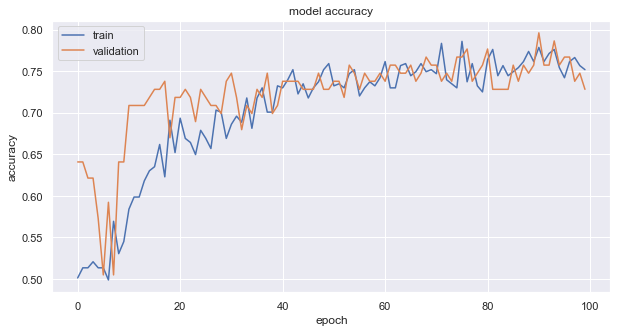

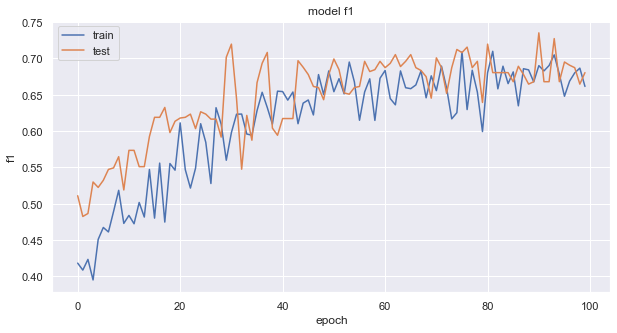

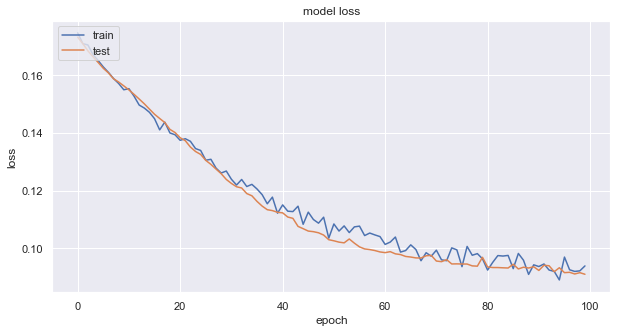

In [131]:
max_metric(history2)
plot_this(history2)

In [132]:
# model2.save("model2.h5")

In [133]:
# from  tensorflow.keras.utils import plot_model
# plot_model(model2, to_file='model.png', show_shapes=True, rankdir="LR", expand_nested=False ,dpi=200)

In [135]:
from sklearn.metrics import f1_score

y_pred = model2.predict(X_test, verbose=1)
y_pred = y_pred>0.5
f1 = f1_score(y_test, y_pred)
print (f"f1 socre is: {f1} ")

254/254 [==============================] - 0s 55us/sample
f1 socre is: 0.6197183098591549 


In [107]:
# apply(lambda x: (x - x.min())/ (x.max() - x.min()) 
# normalize the data
# we do not want to modify our label column Exited
# Pregnancies                  0.000
# Glucose                      0.000
# BloodPressure                0.000
# SkinThickness                0.000
# Insulin                      0.000
# BMI                          0.000
# DiabetesPedigreeFunction     0.078
# Age                         21.000


# Pregnancies                  17.00
# Glucose                     199.00
# BloodPressure               122.00
# SkinThickness                99.00
# Insulin                     846.00
# BMI                          67.10
# DiabetesPedigreeFunction      2.42
# Age                          81.00


## Sorry for hardcoding, i wll fix it ASAP!

def norm_a_data(data):
    data[0] = (data[0] - 0)    / (17 - 0)
    data[1] = (data[1] - 0)    / (199 - 0)
    data[2] = (data[2] - 0)    / (122 - 0)
    data[3] = (data[3] - 0)    / (99 - 0)
    data[4] = (data[4] - 0)    / (846 - 0)
    data[5] = (data[5] - 0)    / (67 - 0)
    data[6] = (data[6] - 0.078) / (2 - 0.078)
    data[7] = (data[7] - 21)    / (81 - 21)
    return data[:]

In [44]:
my_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
my_data = diabetes.iloc[245].values[:8]
my_data = norm_a_data(my_data)
my_data=np.array(my_data)
my_data = my_data.reshape(8,1)
# pd.DataFrame(my_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
#        'DiabetesPedigreeFunction', 'Age'])
model2.predict(my_data.transpose())

array([[0.9581282]], dtype=float32)

In [45]:
diabetes.iloc[245].values[-1]

1.0